In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# unzip
!unzip '/content/drive/MyDrive/CEP_DATA/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/m

In [ ]:
def edge_detection(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)
  # Remove noise by blurring with a Gaussian filter
  img = cv2.GaussianBlur(img, (3, 3), 0)
  #For adaptive threshold values
  med_val = np.median(img)
  lower = int(max(0 ,0.7 * med_val))
  upper = int(min(255,1.3*med_val))
  canny_img = cv2.Canny(image=img, threshold1=lower, threshold2=upper)
  return canny_img

def hist_equalization(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  enhanced_img = cv2.equalizeHist(img)
  return enhanced_img

def saliency(img):
  saliency = cv2.saliency.StaticSaliencyFineGrained_create()
  (success, saliencyMap) = saliency.computeSaliency(img)
  saliencyMap = (saliencyMap * 255).astype("uint8")
  return saliencyMap

In [ ]:
data_path = '/content/Alzheimer_s Dataset'

total_data = {"Mild Demented":[], "Moderate Demented":[], "Non Demented":[], "Very Mild Demented":[]}

for dir in os.listdir(os.path.join(data_path, 'train')):
  for img in os.listdir(data_path+'/train/'+dir):
    if dir == 'MildDemented':
      total_data['Mild Demented'].append(img)
    elif dir == 'ModerateDemented':
      total_data['Moderate Demented'].append(img)
    elif dir == 'NonDemented':
      total_data['Non Demented'].append(img)
    elif dir == 'VeryMildDemented':
      total_data['Very Mild Demented'].append(img)

# Testing


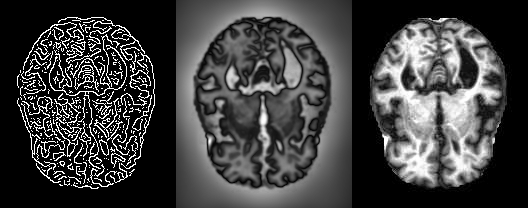

In [ ]:
from google.colab.patches import cv2_imshow


img = cv2.imread("/content/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg")

images = cv2.hconcat([edge_detection(img),saliency(img),hist_equalization(img)])

cv2_imshow(images)

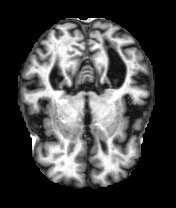

In [ ]:
from google.colab.patches import cv2_imshow


img = cv2.imread("/content/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg")


cv2_imshow(hist_equalization(img))